In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [27]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_cleanup/train_data_cleaned.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14824 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      14824 non-null  int64         
 1   stay_date           14824 non-null  datetime64[ns]
 2   guest_id            14824 non-null  int64         
 3   guest_country_id    14824 non-null  object        
 4   reservation_status  14824 non-null  object        
 5   reservation_date    14824 non-null  datetime64[ns]
 6   date_from           14824 non-null  datetime64[ns]
 7   date_to             14824 non-null  datetime64[ns]
 8   resort_id           14824 non-null  int64         
 9   cancel_date         2764 non-null   object        
 10  room_cnt            14824 non-null  int64         
 11  adult_cnt           14824 non-null  int64         
 12  children_cnt        14824 non-null  int64         
 13  price               12845 non-null  float64       


In [28]:
df.head()

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,...,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
0,73710,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,None,...,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0,2.0,2127.731
2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,...,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857
3,74461,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,2008-01-01,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766
4,74466,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,2007-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0,2.0,NaN
6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766


In [40]:
df['children_cnt'].head()

0    0
2    0
3    0
4    0
6    0
Name: children_cnt, dtype: int64

In [41]:
df['children_cnt'].unique()

array([0, 1])

Analiza po statusu rezervacije

In [29]:
df['reservation_status'].unique()

array(['Checked-out', 'Cancelled', 'No-show'], dtype=object)

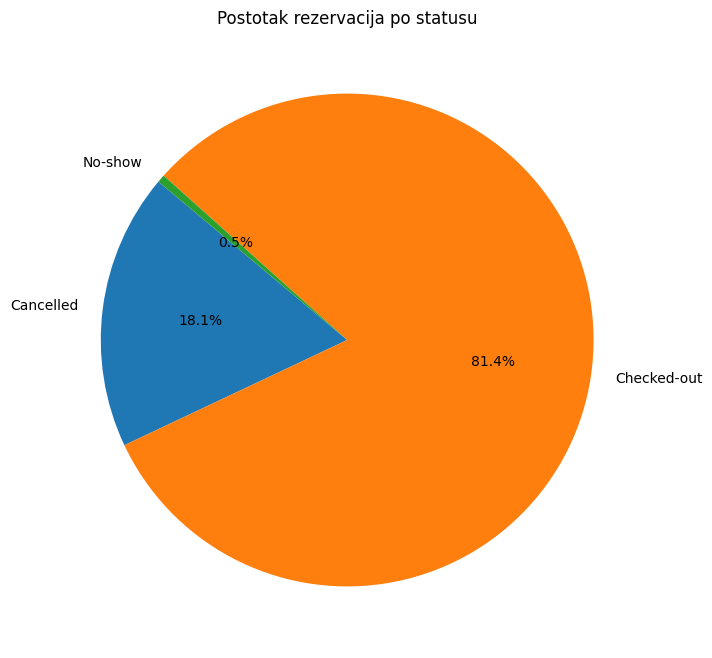

In [30]:
frekvencija_po_statusu = df['reservation_status'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_statusu, labels=frekvencija_po_statusu.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po statusu')
plt.show()

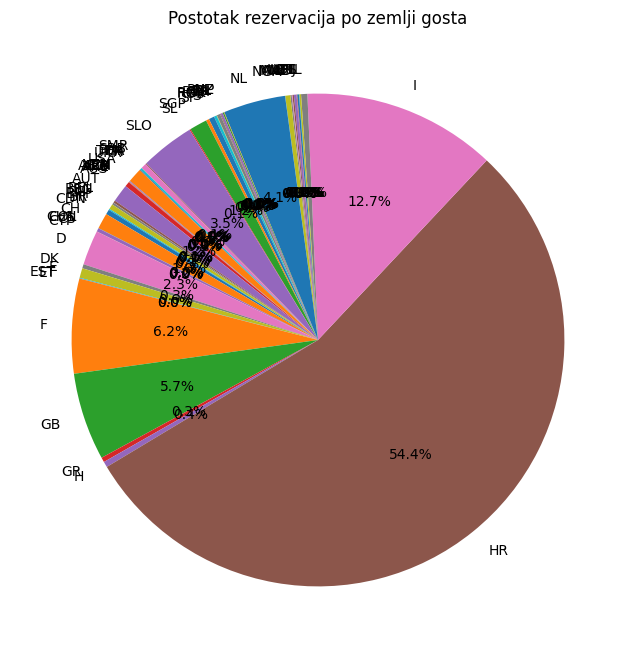

In [31]:
frekvencija_po_zemlji = df['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

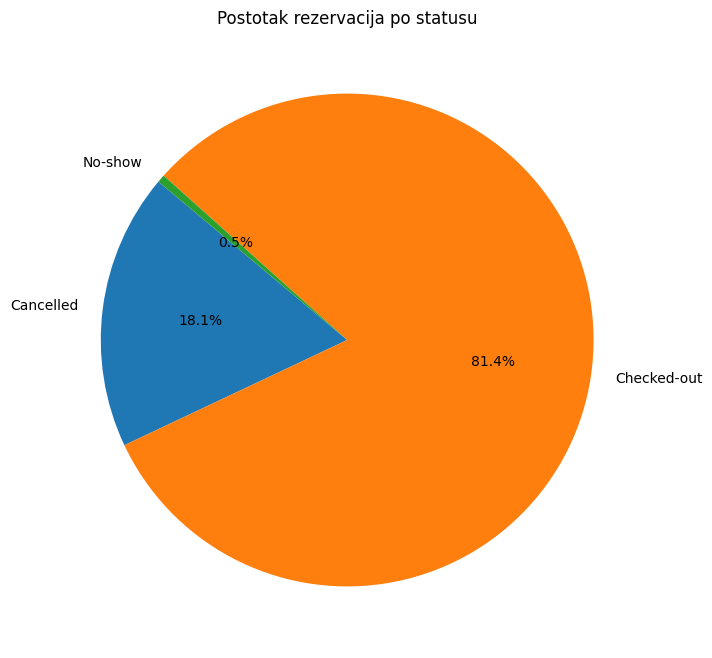

In [32]:
frekvencija_po_statusu = df['reservation_status'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_statusu, labels=frekvencija_po_statusu.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po statusu')
plt.show()

In [33]:
df['resort_id'].unique

<bound method Series.unique of 0        1
2        1
3        1
4        1
6        1
        ..
31627    1
31630    1
31631    1
31632    1
31633    1
Name: resort_id, Length: 14824, dtype: int64>

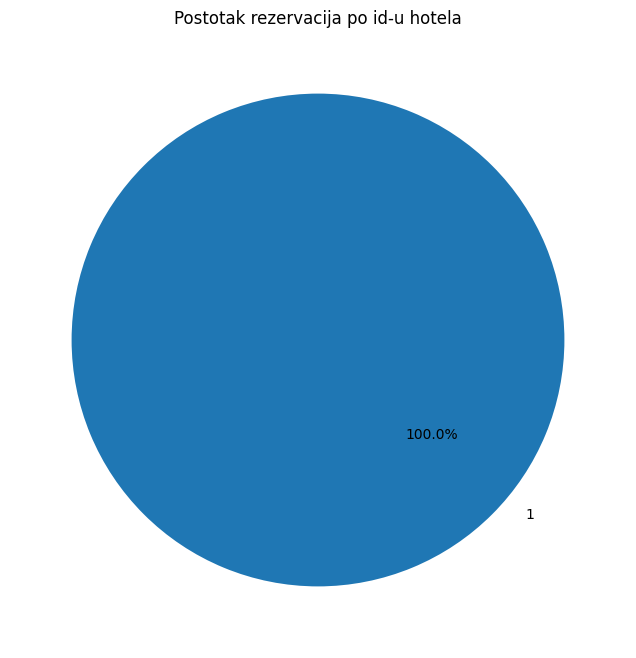

In [34]:
frekvencija_po_hotel_id = df['resort_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_hotel_id, labels=frekvencija_po_hotel_id.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po id-u hotela')
plt.show()

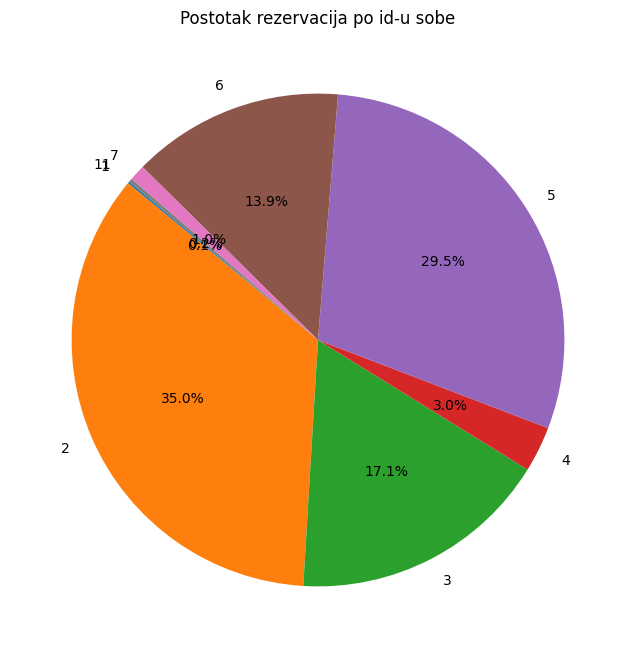

In [35]:
frekvencija_po_soba_id = df['room_category_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_soba_id, labels=frekvencija_po_soba_id.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po id-u sobe')
plt.show()

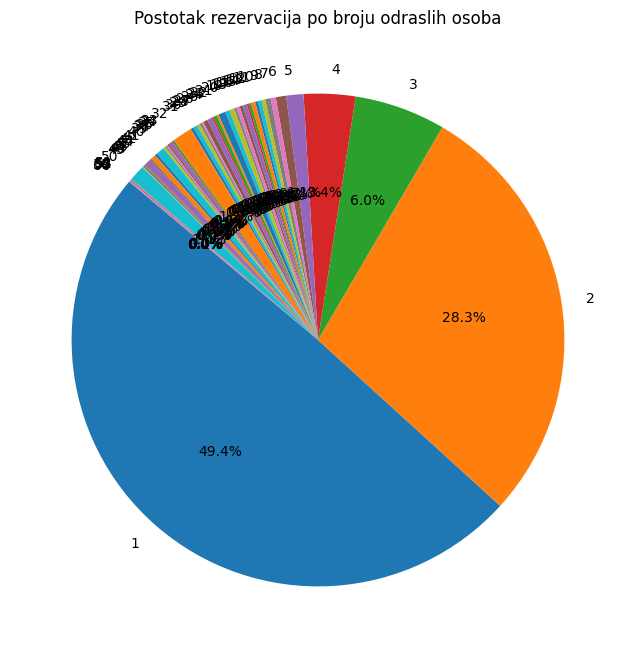

In [36]:
frekvencija_po_odraslim = df['adult_cnt'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_odraslim, labels=frekvencija_po_odraslim.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju odraslih osoba')
plt.show()

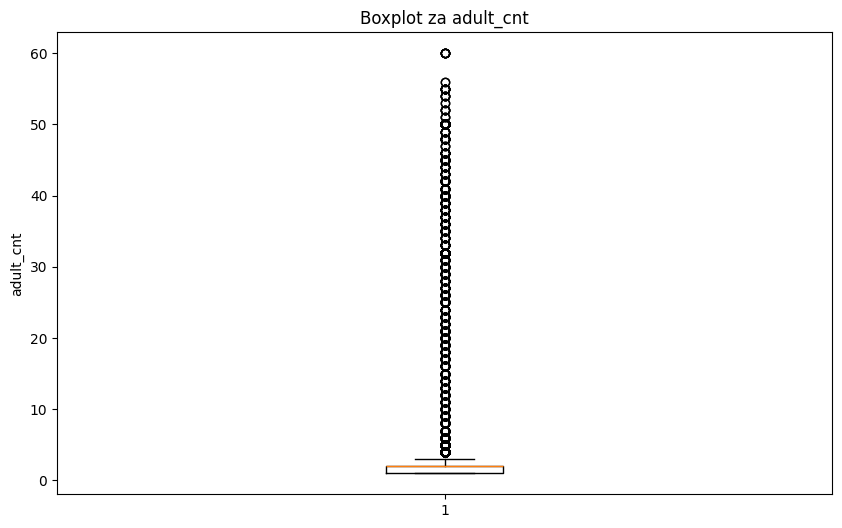

In [37]:
plt.figure(figsize=(10, 6)) 
plt.boxplot(df['adult_cnt'])
plt.title('Boxplot za adult_cnt')
plt.ylabel('adult_cnt')
plt.show()

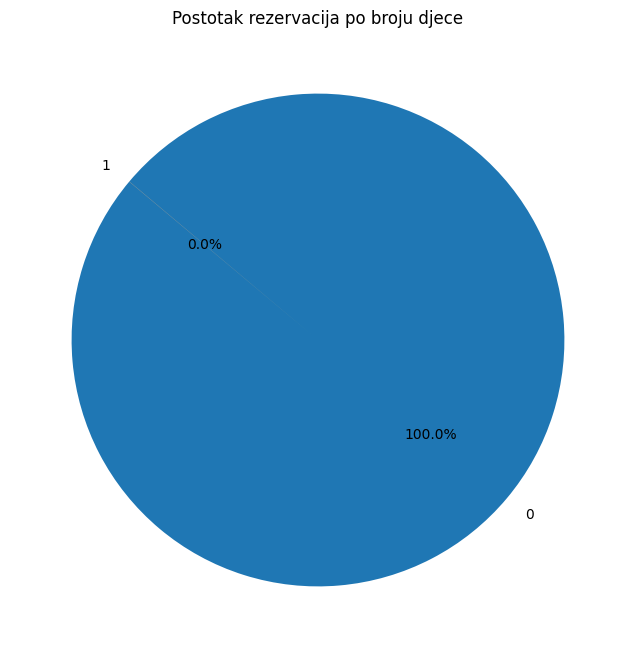

In [38]:
frekvencija_po_djeci = df['children_cnt'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_djeci, labels=frekvencija_po_djeci.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju djece')
plt.show()

In [42]:
frekvencija_po_djeci.head()

children_cnt
0    14823
1        1
Name: count, dtype: int64

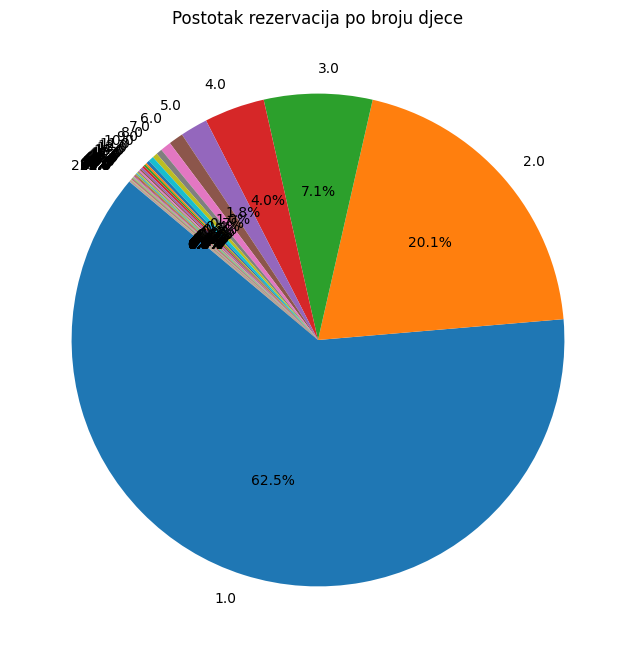

In [43]:
frekvencija_po_broju_nocenja = df['stay_nights'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_nocenja, labels=frekvencija_po_broju_nocenja.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po broju djece')
plt.show()

In [47]:
df['stay_nights'].max()

226.0

In [46]:
df['stay_nights'].min()

1.0

In [49]:
df['stay_nights'].mean()

2.097072315164598

In [52]:
df['stay_nights'].median()

1.0

In [57]:
df_clean = df.dropna(subset=['price_per_night'])

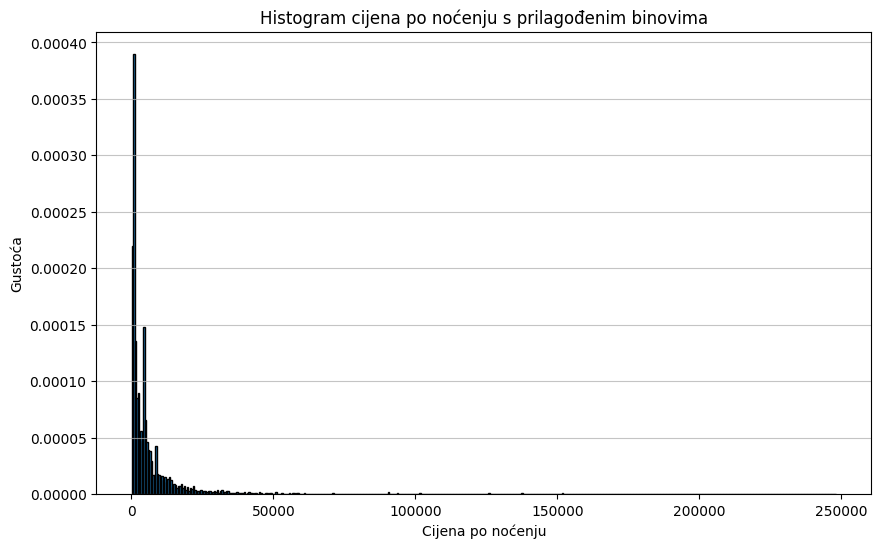

In [58]:


# Izračunajte IQR
Q1 = df_clean['price_per_night'].quantile(0.25)
Q3 = df_clean['price_per_night'].quantile(0.75)
IQR = Q3 - Q1

# Broj promatranja
n = len(df_clean)

# Izračunajte širinu binova prema Freedman-Diaconis pravilu
bin_width = 2 * IQR * (n ** (-1/3))

# Izračunajte ukupan broj binova
bin_number = round((df_clean['price_per_night'].max() - df_clean['price_per_night'].min()) / bin_width)

# Izrada histograma
plt.figure(figsize=(10, 6))
plt.hist(df_clean['price_per_night'], bins=bin_number, density=True, edgecolor='black')
plt.title('Histogram cijena po noćenju s prilagođenim binovima')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

plt.show()

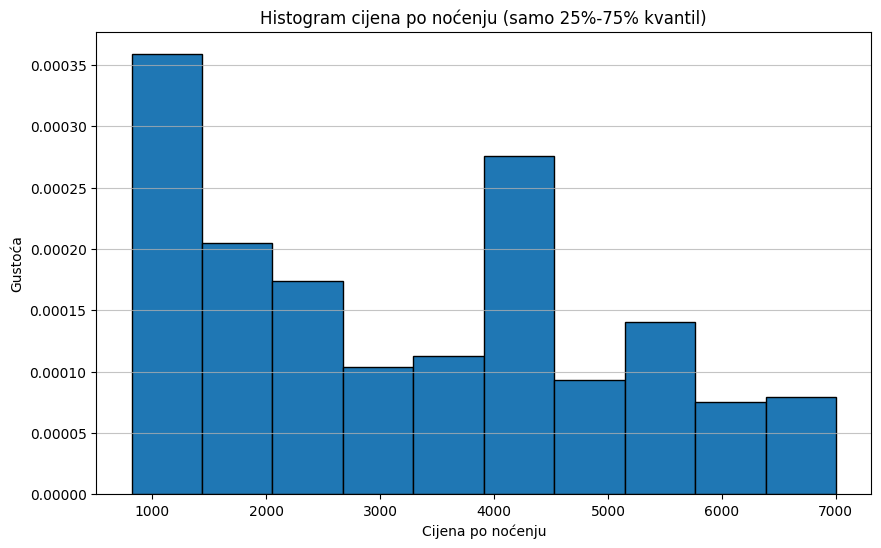

In [64]:
filtered_data = df[(df['price_per_night'] > Q1) & (df['price_per_night'] < Q3)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price_per_night'], bins=10, density=True, edgecolor='black')  # 'auto' može koristiti internu logiku za određivanje broja binova
plt.title('Histogram cijena po noćenju (samo 25%-75% kvantil)')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

#visine u grafikonu prikazuju relativnu frekvenicju svakog intervala cijene podijeljenu sa duljinom tog interavala

In [65]:
filtered_data['price_per_night'].max()-filtered_data['price_per_night'].min()

6185.44425

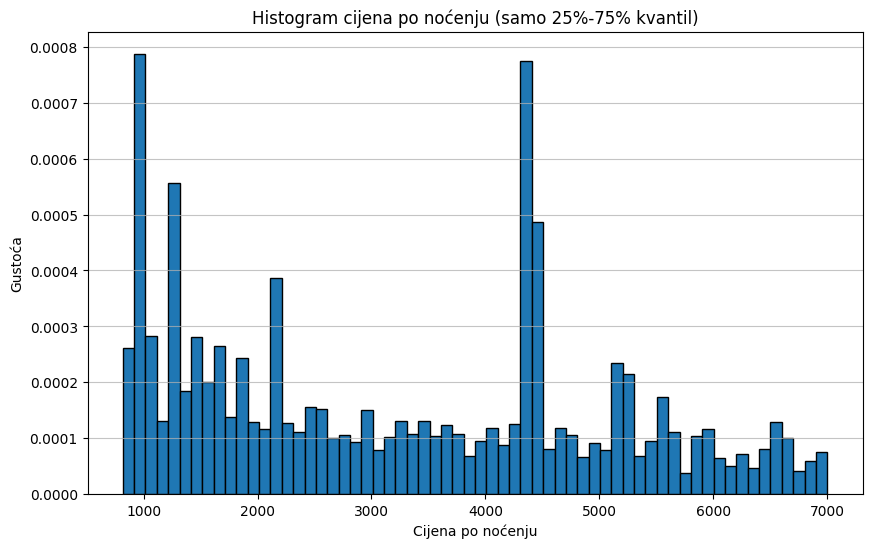

In [87]:
len = filtered_data['price_per_night'].max()-filtered_data['price_per_night'].min()
bin_width = 100
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price_per_night'], bins=bin_number, density=True, edgecolor='black')  # 'auto' može koristiti internu logiku za određivanje broja binova
plt.title('Histogram cijena po noćenju (samo 25%-75% kvantil)')
plt.xlabel('Cijena po noćenju')
plt.ylabel('Gustoća')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

In [74]:
df_clean_total_price = df.dropna(subset=['total_price'])

In [83]:
filtered_data_total_price['total_price'].max()-filtered_data_total_price['total_price'].min()

6184.318

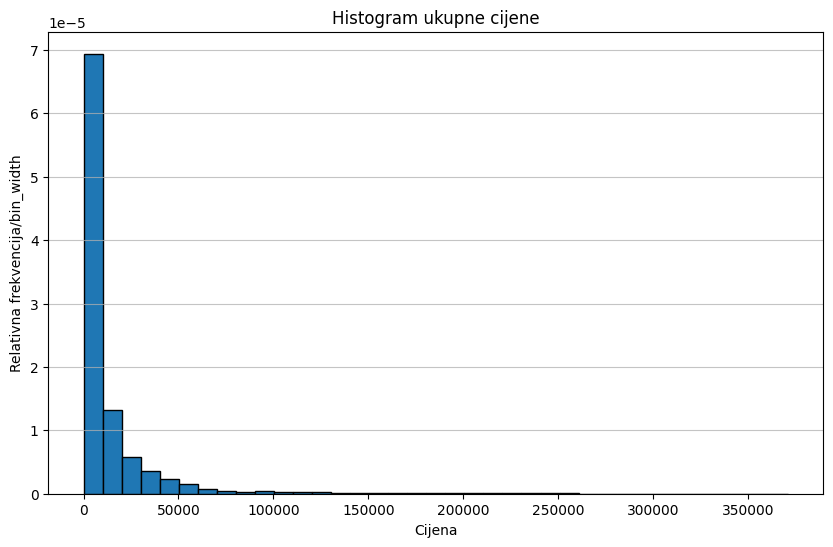

In [82]:
len = df_clean_total_price['total_price'].max()-df_clean_total_price['total_price'].min()
bin_width = 10000
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(df_clean_total_price['total_price'], bins=bin_number, density=True, edgecolor='black')  
plt.title('Histogram ukupne cijene')
plt.xlabel('Cijena')
plt.ylabel('Relativna frekvencija/bin_width')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

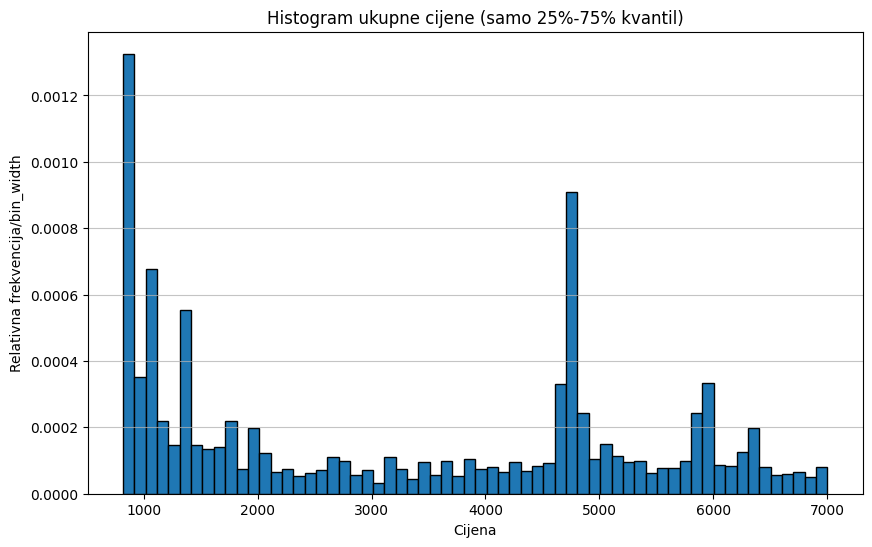

In [85]:
len = filtered_data_total_price['total_price'].max()-filtered_data_total_price['total_price'].min()
bin_width = 100
bin_number = round(len / bin_width)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_total_price['total_price'], bins=bin_number, density=True, edgecolor='black')  
plt.title('Histogram ukupne cijene (samo 25%-75% kvantil)')
plt.xlabel('Cijena')
plt.ylabel('Relativna frekvencija/bin_width')
plt.grid(axis='y', alpha=0.75)

# Prikazujemo grafikon
plt.show()

In [76]:
filtered_data_total_price = df[(df['total_price'] > Q1) & (df['total_price'] < Q3)]